# Q-2-1 Binary Logistic Regression

Janet Matsen

Code notes:


In [1]:
import numpy as np
import matplotlib as mpl
%matplotlib inline
import time

import pandas as pd
import seaborn as sns

from mnist import MNIST  # public package for making arrays out of MINST data.

In [2]:
import sys
sys.path.append('../code/')

In [3]:
from logistic_regression import LogisticRegression, LogisticRegressionBinary
from hyperparameter_explorer import HyperparameterExplorer

In [4]:
from mnist_helpers import mnist_training, mnist_testing, mnist_training_binary, mnist_testing_binary

In [5]:
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 4, 3

### Prepare MNIST training data

In [6]:
from sklearn.datasets import make_classification
all_X, all_y = make_classification(n_samples=300, n_features=15, 
                           n_redundant=5, n_repeated=0, 
                           n_classes=2, n_clusters_per_class=1, 
                           weights=None, flip_y=0.01, class_sep=1.0, 
                           hypercube=True, shift=0.0, scale=1.0, 
                           shuffle=True, random_state=None)
train_X, train_y = all_X[30:, ], all_y[30:,]
test_X, test_y = all_X[0:30, ], all_y[0:30,]

In [7]:
print(train_X.shape, train_y.shape)
print(test_X.shape, test_y.shape)

(270, 15) (270,)
(30, 15) (30,)


## Explore hyperparameters before training model on all of the training data.

In [8]:
hyper_explorer = HyperparameterExplorer(X=train_X, y=train_y, 
                                        model=LogisticRegressionBinary, 
                                        validation_split=0.2, 
                                        score_name = '-(log loss), training', 
                                        #fit_params = ('eta0', 'lam'),
                                        use_prev_best_weights=True,
                                        test_X = test_X, test_y = test_y)  # need test_X, test_y for loss w/ fit plot

54 of 270 points from training are reserved for validation


....Loss optimized.  Old/N: 0.6928925273117981, new/N:0.6928287501020726. Eta: 4.14086662499961e-07


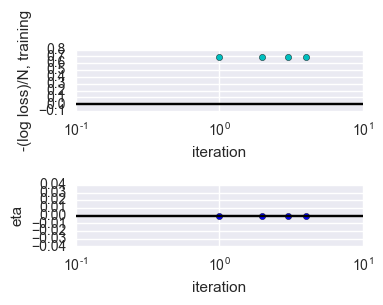

In [9]:
hyper_explorer.train_model(lam=0, eta0=2e-4, max_iter=10**2, delta_percent=0.01, verbose=True)

In [10]:
len(hyper_explorer.models)

1

.Loss optimized.  Old/N: 0.6928287596107223, new/N:0.692778351738967. Eta: 3.2736425054932755e-07


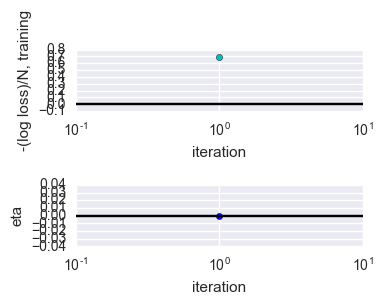

In [11]:
hyper_explorer.train_model(lam=0, eta0=1e-4, max_iter=10**2, delta_percent=0.01, verbose=True)

In [12]:
hyper_explorer.summary

,# nonzero weights,"-(log loss), training","-(log loss)/N, training",eta,eta0,iteration,lambda,lambda normalized,log loss,model number,training (0/1 loss)/N,training 0/1 loss,weights,"-(log loss), validation","-(log loss)/N, validation",validation (0/1 loss)/N,validation 0/1 loss
0,0,149.651010,0.692829,4.140867e-07,0.0002,4,0,0.0,-149.651010,1,0.166667,36,"[0.000208754407414, 1.40446905788e-05, 1.85872...",37.410084,0.692779,0.074074,4
1,0,149.640124,0.692778,3.273643e-07,0.0001,1,0,0.0,-149.640124,2,0.166667,36,"[0.000241811340422, 1.62697176111e-05, 2.15308...",37.406939,0.692721,0.074074,4


.Loss optimized.  Old/N: 0.6927783532403543, new/N:0.6927279557528675. Eta: 3.2736425054932755e-07


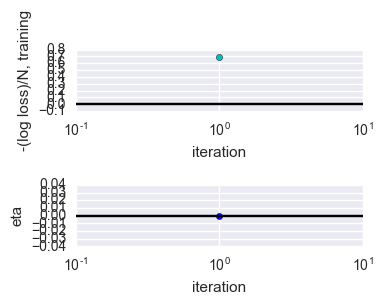

In [13]:
hyper_explorer.train_model(lam=0, eta0=1e-4, max_iter=10**2, delta_percent=0.01, verbose=True)

.Loss optimized.  Old/N: 0.6927279572521816, new/N:0.6926775701467469. Eta: 3.2736425054932755e-07


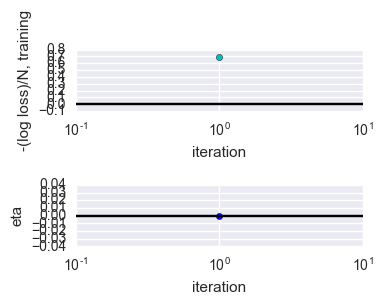

In [14]:
hyper_explorer.train_model(lam=0, eta0=1e-4, max_iter=10**2, delta_percent=0.01, verbose=True)

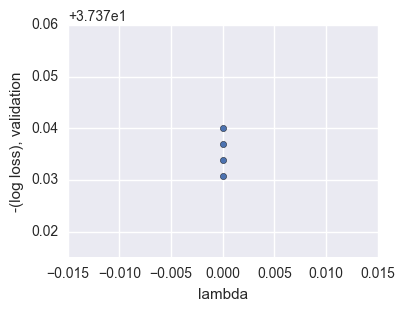

In [15]:
hyper_explorer.summary.plot.scatter(x='lambda', y='-(log loss), validation')

.Loss optimized.  Old/N: 0.6926775716439899, new/N:0.6926271949433978. Eta: 3.2736425054932755e-07


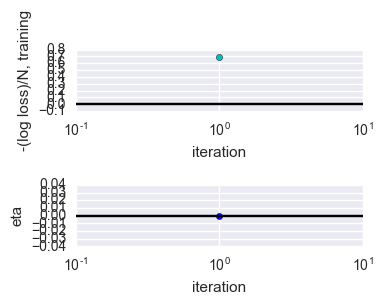

In [16]:
hyper_explorer.train_model(lam=10, eta0=1e-4, max_iter=10**2, delta_percent=0.01, verbose=True)

.Loss optimized.  Old/N: 0.6926271964385718, new/N:0.6925768301182752. Eta: 3.2736425054932755e-07


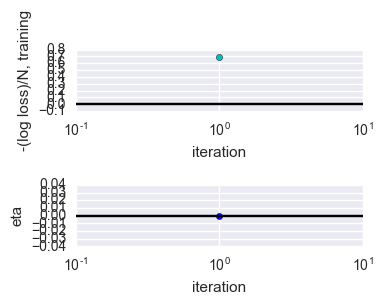

In [17]:
hyper_explorer.train_model(lam=10, eta0=1e-4, max_iter=10**2, delta_percent=0.01, verbose=True)

.Loss optimized.  Old/N: 0.6925768316113818, new/N:0.6925264756691637. Eta: 3.2736425054932755e-07


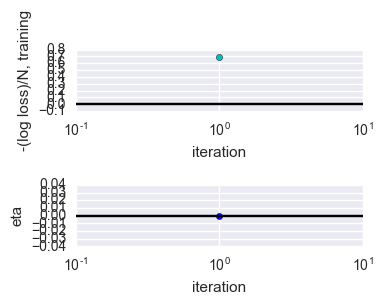

In [18]:
hyper_explorer.train_model(lam=10, eta0=1e-4, max_iter=10**2, delta_percent=0.01, verbose=True)

.Loss optimized.  Old/N: 0.6925264771602051, new/N:0.6924761318912758. Eta: 3.2736425054932755e-07


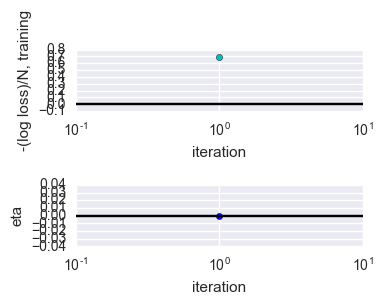

In [19]:
hyper_explorer.train_model(lam=1e2, eta0=1e-4, max_iter=10**2, delta_percent=0.01, verbose=True)

.Loss optimized.  Old/N: 0.6924761333802542, new/N:0.692425798509015. Eta: 3.2736425054932755e-07


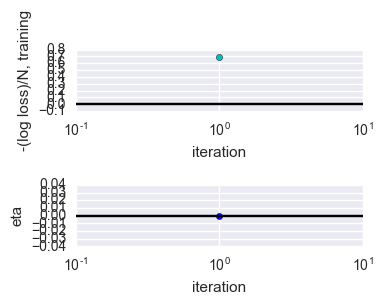

In [20]:
hyper_explorer.train_model(lam=1e2, eta0=1e-4, max_iter=10**2, delta_percent=0.01, verbose=True)

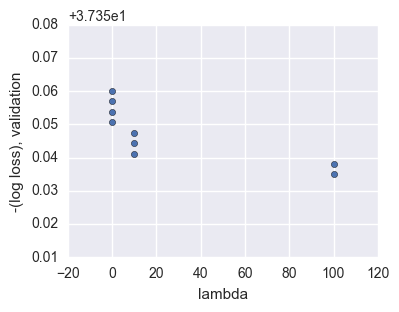

In [21]:
hyper_explorer.summary.plot.scatter(x='lambda', y='-(log loss), validation')

.Loss optimized.  Old/N: 0.6924257999959317, new/N:0.6923754789764984. Eta: 3.2736425054932755e-07


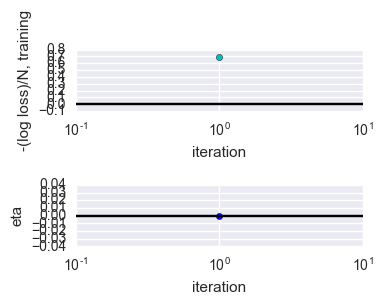

In [22]:
hyper_explorer.train_model(lam=1e3, eta0=1e-4, max_iter=10**2, delta_percent=0.01, verbose=True)

.Loss optimized.  Old/N: 0.6923754804613559, new/N:0.6923251700753454. Eta: 3.2736425054932755e-07


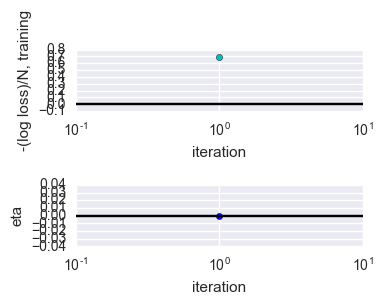

In [23]:
hyper_explorer.train_model(lam=1e3, eta0=1e-4, max_iter=10**2, delta_percent=0.01, verbose=True)

.Loss optimized.  Old/N: 0.6923251715581457, new/N:0.6922748718032041. Eta: 3.2736425054932755e-07


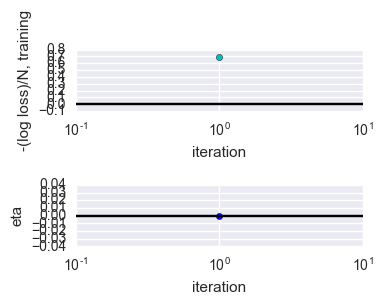

In [24]:
hyper_explorer.train_model(lam=1e3, eta0=1e-4, max_iter=10**2, delta_percent=0.01, verbose=True)

.Loss optimized.  Old/N: 0.6922748732839489, new/N:0.6922246259460528. Eta: 3.2736425054932755e-07


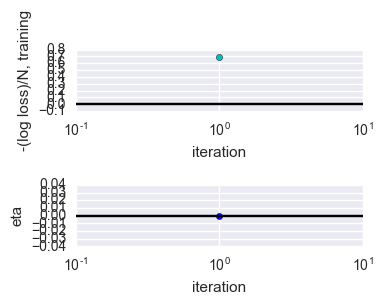

In [25]:
hyper_explorer.train_model(lam=1e4, eta0=1e-4, max_iter=10**2, delta_percent=0.01, verbose=True)

.Loss optimized.  Old/N: 0.6922246274247449, new/N:0.6921743931091575. Eta: 3.2736425054932755e-07


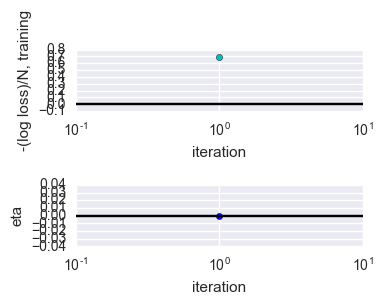

In [26]:
hyper_explorer.train_model(lam=1e4, eta0=1e-4, max_iter=10**2, delta_percent=0.01, verbose=True)

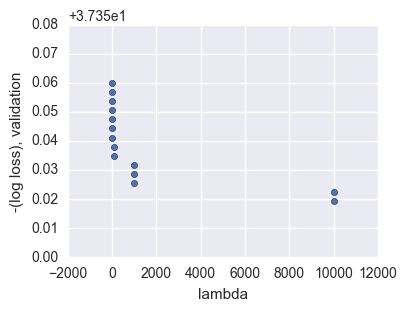

In [27]:
hyper_explorer.summary.plot.scatter(x='lambda', y='-(log loss), validation')

.Loss optimized.  Old/N: 0.6921743945858002, new/N:0.6921246392591942. Eta: 3.2736425054932755e-07


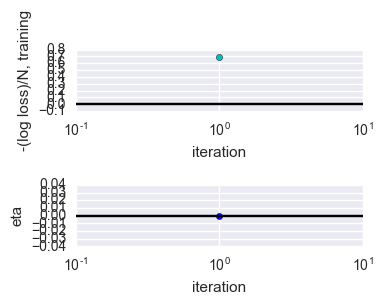

In [28]:
hyper_explorer.train_model(lam=1e5, eta0=1e-4, max_iter=10**2, delta_percent=0.01, verbose=True)

.Loss optimized.  Old/N: 0.6921246407337986, new/N:0.692074922108705. Eta: 3.2736425054932755e-07


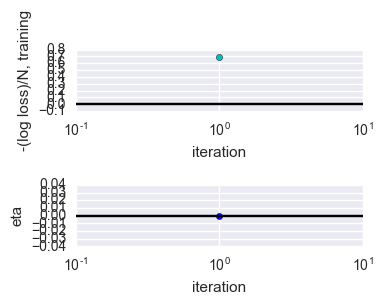

In [29]:
hyper_explorer.train_model(lam=1e5, eta0=1e-4, max_iter=10**2, delta_percent=0.01, verbose=True)

.Loss optimized.  Old/N: 0.6920749235812832, new/N:0.6920303773102212. Eta: 3.2736425054932755e-07


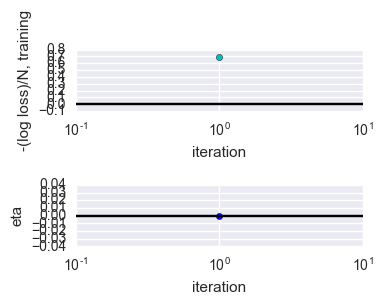

In [30]:
hyper_explorer.train_model(lam=1e6, eta0=1e-4, max_iter=10**2, delta_percent=0.01, verbose=True)

.Loss optimized.  Old/N: 0.6920303787808808, new/N:0.6920395696104668. Eta: 3.2736425054932755e-07


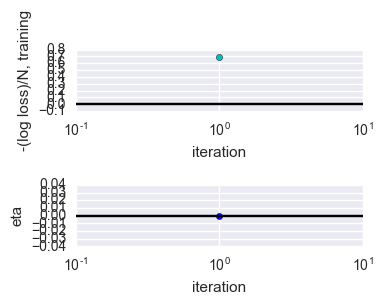

In [31]:
hyper_explorer.train_model(lam=1e7, eta0=1e-4, max_iter=10**2, delta_percent=0.01, verbose=True)

....Loss optimized.  Old/N: 0.6928842719911628, new/N:0.6929409557347105. Eta: 2.070433312499805e-07


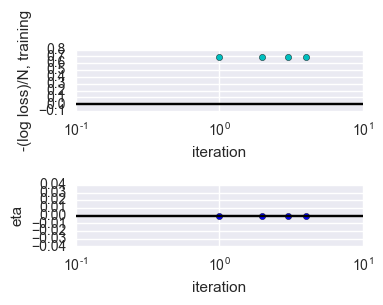

In [32]:
hyper_explorer.train_model(lam=1e8, eta0=1e-4, max_iter=10**2, delta_percent=0.01, verbose=True)

....Loss optimized.  Old/N: 0.6929553881087034, new/N:0.6930168196577052. Eta: 2.0704333124998053e-08


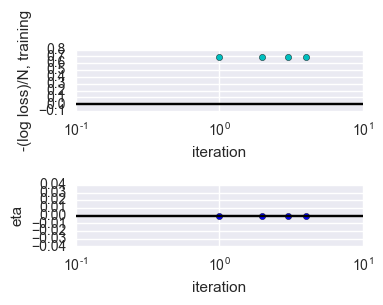

In [33]:
hyper_explorer.train_model(lam=1e9, eta0=1e-5, max_iter=10**2, delta_percent=0.01, verbose=True)

....Loss optimized.  Old/N: 0.6929625009757824, new/N:0.6930244076112245. Eta: 2.070433312499805e-09


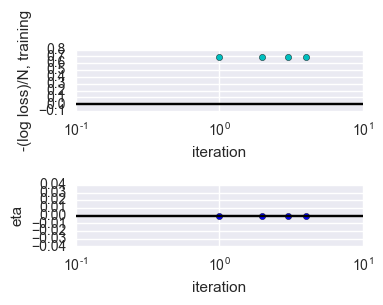

In [34]:
hyper_explorer.train_model(lam=1e10, eta0=1e-6, max_iter=10**2, delta_percent=0.01, verbose=True)

....Loss optimized.  Old/N: 0.6929632834050969, new/N:0.6930252423034438. Eta: 2.070433312499805e-11


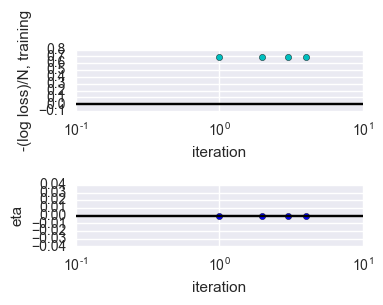

In [35]:
hyper_explorer.train_model(lam=1e12, eta0=1e-8, max_iter=10**2, delta_percent=0.01, verbose=True)

.Loss optimized.  Old/N: 0.6920303787808808, new/N:0.6920309731435889. Eta: 3.273642505493275e-14


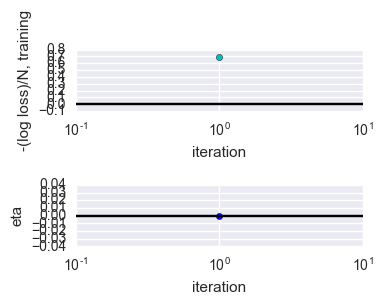

In [36]:
hyper_explorer.train_model(lam=1e12, eta0=1e-11, max_iter=10**2, delta_percent=0.001, verbose=True)

In [37]:
hyper_explorer.summary.tail(4)

,# nonzero weights,"-(log loss), training","-(log loss)/N, training",eta,eta0,iteration,lambda,lambda normalized,log loss,model number,training (0/1 loss)/N,training 0/1 loss,weights,"-(log loss), validation","-(log loss)/N, validation",validation (0/1 loss)/N,validation 0/1 loss
19,0,149.691633,0.693017,2.070433e-08,1.000000e-05,4,1.000000e+09,1.627586e+07,-149.691633,20,0.166667,36,"[8.54387026779e-05, 5.75348402881e-06, 7.60860...",37.421816,0.692997,0.074074,4
20,0,149.693272,0.693024,2.070433e-09,1.000000e-06,4,1.000000e+10,1.627586e+08,-149.693272,21,0.166667,36,"[8.04650619103e-05, 5.4186365625e-06, 7.165700...",37.422289,0.693005,0.074074,4
21,0,149.693452,0.693025,2.070433e-11,1.000000e-08,4,1.000000e+12,1.627586e+10,-149.693452,22,0.166667,36,"[7.99179539939e-05, 5.38180333844e-06, 7.11698...",37.422341,0.693006,0.074074,4
22,0,149.478690,0.692031,3.273643e-14,1.000000e-11,1,1.000000e+12,1.627586e+10,-149.478690,23,0.166667,36,"[0.000732302710558, 4.93144412377e-05, 6.52141...",37.360311,0.691858,0.074074,4


In [38]:
hyper_explorer.validation_score_name

'-(log loss), validation'

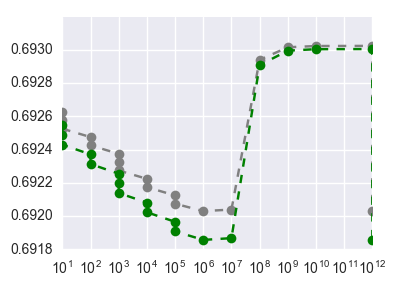

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
plot_data = hyper_explorer.summary
plt.semilogx(plot_data['lambda'], plot_data['-(log loss)/N, training'],
                     linestyle='--', marker='o', c='grey')
plt.semilogx(plot_data['lambda'], plot_data['-(log loss)/N, validation'],
                     linestyle='--', marker='o', c='green')
#plt.ylim((4000, 4400))

In [40]:
hyper_explorer.best("model").results_row()

{'# nonzero weights': [0],
 '-(log loss), training': [149.47856149900778],
 '-(log loss)/N, training': [0.69203037731022121],
 'eta': [3.2736425054932755e-07],
 'eta0': [0.0001],
 'iteration': [1],
 'lambda': [1000000.0],
 'lambda normalized': [16275.855998939187],
 'log loss': [-149.47856149900778],
 'training (0/1 loss)/N': [0.16666666666666666],
 'training 0/1 loss': [36],
 'weights': [array([  7.32693096e-04,   4.93407304e-05,   6.52489572e-05,
           4.93480418e-05,   7.92325948e-04,   1.97439342e-04,
          -5.56161250e-04,   9.66913303e-06,  -3.24579232e-05,
           3.43759899e-05,   7.45983264e-06,  -3.96572800e-07,
          -7.89941789e-06,   2.12312533e-05,  -4.75751720e-04])]}

In [41]:
hyper_explorer.best("result")

best -(log loss), validation = 16    37.360274
Name: -(log loss), validation, dtype: float64; found in model 17


In [42]:
hyper_explorer.train_on_whole_training_set(lam=1e6, eta0=0.0001)

best cross-validation model's info:
                                                                          16
# nonzero weights                                                          0
-(log loss), training                                                149.479
-(log loss)/N, training                                              0.69203
eta                                                              3.27364e-07
eta0                                                                  0.0001
iteration                                                                  1
lambda                                                                 1e+06
lambda normalized                                                    16275.9
log loss                                                            -149.479
model number                                                              17
training (0/1 loss)/N                                               0.166667
training 0/1 loss                       

In [43]:
hyper_explorer.test_X  = test_X
hyper_explorer.test_y  = test_y

In [44]:
hyper_explorer.evaluate_test_data(eta0=0, lam=0)

                                                                     0
# nonzero weights                                                    2
-(log loss), test                                              20.7463
-(log loss)/N, test                                           0.691545
eta                                                                  0
eta0                                                                 0
iteration                                                            0
lambda                                                               0
lambda normalized                                                    0
log loss                                                      -20.7463
test (0/1 loss)/N                                             0.233333
test 0/1 loss                                                        7
weights              [0.00127823098806, 8.61734023476e-05, 0.000113...


../code/hyperparameter_explorer.py:124: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  plot_data = self.summary.sort(x)


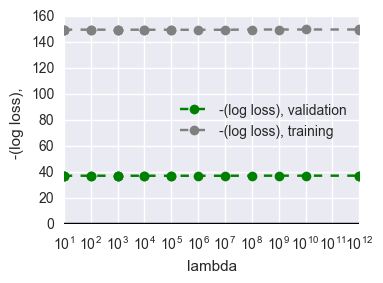

In [45]:
t = time.localtime(time.time())

hyper_explorer.plot_fits(filename = "Q-2-1_val_and_train_RMSE_{}-{}".format(t.tm_mon, t.tm_mday))

In [46]:
#hyper_explorer.plot_fits(ylim=(.6,.7),
#                         filename = "Q-2-1_val_and_train_RMSE_zoomed_in{}-{}".format(t.tm_mon, t.tm_mday))

In [47]:
assert False

AssertionError: 

In [ ]:
hyper_explorer.best('score')

In [ ]:
hyper_explorer.best('summary')

In [ ]:
hyper_explorer.best('best score')

In [ ]:
hyper_explorer.train_on_whole_training_set(lam=1e7)

In [ ]:
hyper_explorer.final_model.results_row()

In [ ]:
hyper_explorer.evaluate_test_data()